In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import os

params = {
    'axes.titlesize': '20'
}
plb.rcParams.update(params)

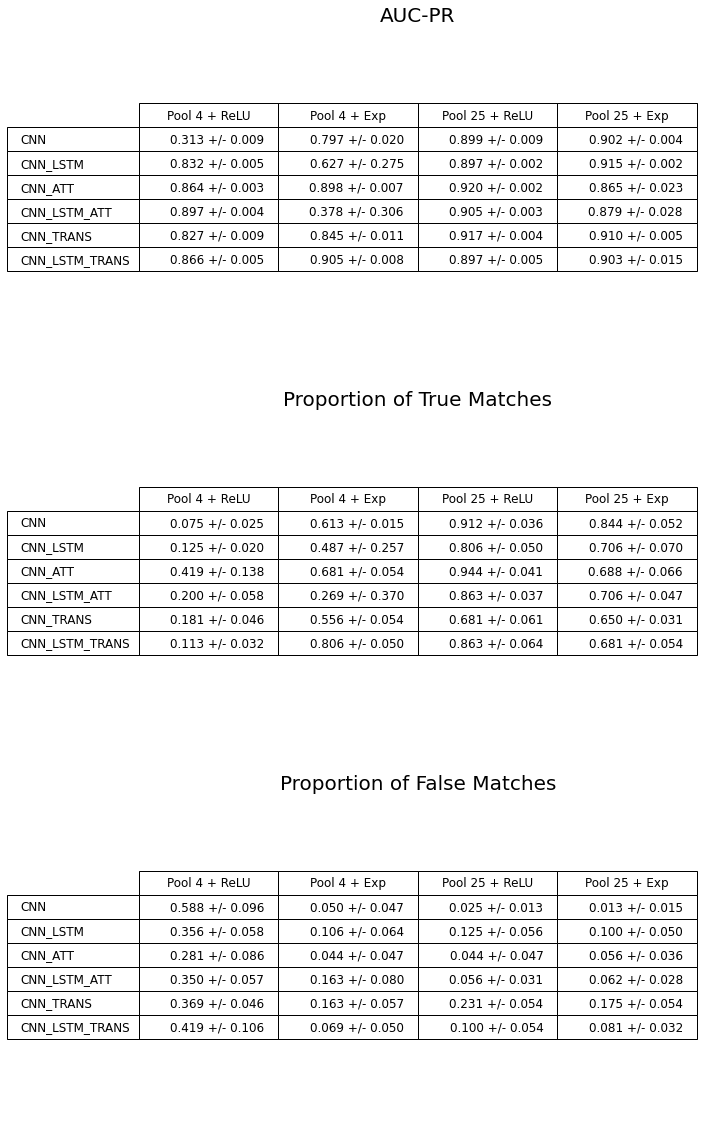

In [2]:
bases = ['Pool 4 + ReLU', 'Pool 4 + Exp', 'Pool 25 + ReLU', 'Pool 25 + Exp']

archs = ['CNN', 'CNN_LSTM', 'CNN_LSTM_ATT', 'CNN_LSTM_TRANS']
stats1 = []
for i in range(len(archs)):
    direc1 = archs[i] + '/stats/' + archs[i]
    baselines = np.array([i for i in os.listdir(direc1)])
    baselines.sort()
    
    data1 = []
    for j in range(len(baselines)):
        direc2 = direc1 + '/' + baselines[j]
        files = [a for a in os.listdir(direc2)]
        
        trials = []
        for k in range(len(files)):
            direc3 = direc2 + '/' + files[k]
            trials.append(np.load(direc3)[1:])
        trials = np.array(trials).transpose().astype(float)
        
        data = []
        for k in range(len(trials)):
            mean = np.mean(trials[k])
            stdv = np.std(trials[k])
            data.append('%.3f +/- %.3f' % (mean, stdv))
        data = np.array(data)[[2, 3, 4]]
        # print(archs[i], baselines[j], data[0])
        data1.append(data)
    data1 = np.array(data1)[[3, 2, 1, 0]]
    stats1.append(data1)
stats1 = np.array(stats1).transpose([2, 0, 1])


archs2 = ['CNN_ATT', 'CNN_TRANS']
stats2 = []
for i in range(len(archs2)):
    archs3 = [j for j in os.listdir('.') if archs2[i] in j]
    archs3.sort()
    data1 = []
    for j in range(len(archs3)):
        direc = archs3[j] + '/stats/' + ['heads', 'num_layers'][i] + '/' + ['model-8', 'model-1'][i]
        
        files = [a for a in os.listdir(direc)]
        
        trials = []
        for k in range(len(files)):
            direc1 = direc + '/' + files[k]
            trials.append(np.load(direc1)[1:])
        trials = np.array(trials).transpose().astype(float)
        
        data = []
        for k in range(len(trials)):
            mean = np.mean(trials[k])
            stdv = np.std(trials[k])
            data.append('%.3f +/- %.3f' % (mean, stdv))
        data = np.array(data)[[2, 3, 4]]
        data1.append(data)
    data1 = np.array(data1)[[3, 2, 1, 0]]
    stats2.append(data1)
stats2 = np.array(stats2).transpose([2, 0, 1])

stats = np.concatenate([stats1, stats2], axis=1).transpose(1, 0, 2)[[0, 1, 4, 2, 5, 3]].transpose(1, 0, 2)
archs = np.concatenate([archs, archs2])[[0, 1, 4, 2, 5, 3]]

fig, axes = plt.subplots(3, 1, figsize=(10, 20))
for i in range(len(axes)):
    axes[i].axis('off')
    axes[i].title.set_text(['AUC-PR', 'Proportion of True Matches', 'Proportion of False Matches'][i])
    table = axes[i].table(cellText=stats[i], loc='center', rowLabels=archs, colLabels=bases)
    table.scale(1, 2)
    table.set_fontsize(12)